In [1]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split

from laughter_classification.sspnet_data_sampler import SSPNetDataSampler

### Set constants and fix seed

In [2]:
FRAME_SEC = 0.5
MFCC_FEATURES = 20
FBANK_FEATURES = 128
FEATURES = MFCC_FEATURES + FBANK_FEATURES
SEED = 42
TEST_SIZE = 0.3
EPOCHS = 100

np.random.seed(SEED)
torch.manual_seed(SEED)

### Load data

In [3]:
sampler = SSPNetDataSampler('data/vocalizationcorpus/')

In [4]:
data = sampler.create_sampled_df(FRAME_SEC, save_path='data/sampled_data.csv')

loading df:  data/sampled_data.csv


In [5]:
print(f'Frames without laugh: {len(data.loc[data["IS_LAUGHTER"] == 0])}') 
print(f'Frames with    laugh: {len(data.loc[data["IS_LAUGHTER"] == 1])}')

Frames without laugh: 58041
Frames with    laugh: 2129


In [6]:
data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V140,V141,V142,V143,V144,V145,V146,V147,IS_LAUGHTER,SNAME
0,721.311620,39.960290,6.302041,33.157860,4.127883,6.901188,-2.821500,18.229724,1.184624,-7.028255,...,4.881341e+05,4.647760e+05,3.268816e+05,3.517657e+05,5.174890e+05,6.077015e+05,4.218171e+05,2.174354e+04,0,S2044
1,732.296215,33.696921,7.052002,28.558486,5.319928,9.186646,-6.305057,18.251215,-1.087790,-4.342607,...,2.724328e+06,6.808567e+05,6.954919e+05,2.600496e+06,1.051496e+07,6.368782e+06,2.122752e+06,1.880146e+05,0,S2044
2,750.976046,22.520812,9.401386,26.709852,-1.008760,13.841683,-5.259598,17.157061,0.192730,2.421363,...,2.747220e+06,2.012844e+06,1.346534e+06,2.192968e+06,3.895825e+06,2.664101e+06,1.368073e+06,4.866386e+04,0,S2044
3,756.605243,31.571404,5.207126,24.906358,-6.888693,15.605410,-8.168997,14.939672,-0.006372,-0.889879,...,1.056809e+06,7.565004e+05,7.589118e+05,6.860861e+05,8.465996e+05,8.768743e+05,5.106454e+05,2.843584e+04,0,S2044
4,722.506717,40.780914,22.902785,17.051851,-9.288310,18.211233,-6.658574,11.726759,-0.915189,1.429833,...,8.305880e+05,7.630067e+05,5.538631e+05,5.153400e+05,6.130944e+05,5.871541e+05,3.151520e+05,2.464632e+04,0,S2044
5,696.484986,41.580923,25.178597,20.177824,-5.897561,19.302691,-2.574586,14.529226,2.922336,-0.122821,...,4.949633e+05,4.614132e+05,3.475399e+05,3.609997e+05,4.240580e+05,4.703437e+05,2.531913e+05,1.334189e+04,0,S2044
6,710.147825,33.261088,20.491870,33.608639,-7.202999,10.412338,1.367552,10.543707,-3.823221,2.618712,...,5.396724e+05,4.358129e+05,3.829425e+05,4.303462e+05,4.862783e+05,5.692393e+05,3.482952e+05,2.598956e+04,0,S2044
7,936.221430,48.343334,0.960327,16.235094,-20.483255,5.242887,-1.110214,-4.415252,-5.094917,10.810628,...,4.234044e+08,4.122098e+08,2.756732e+08,1.636864e+08,1.671085e+08,1.616503e+08,1.332305e+08,6.320427e+07,0,S2044
8,932.144210,61.921752,-9.916411,15.886042,-21.190722,0.157634,-2.805371,-5.655453,-2.769601,17.739468,...,4.915618e+08,6.854933e+08,6.421082e+08,4.282451e+08,2.759122e+08,1.944993e+08,9.624162e+07,6.297629e+07,0,S2044
9,733.360750,38.382889,9.344382,14.139308,-1.484390,23.132004,-12.038015,4.304355,0.429609,3.932621,...,1.139839e+06,8.294716e+05,4.671452e+05,4.261399e+05,5.517207e+05,6.125755e+05,6.214118e+05,2.149915e+04,0,S2044


### Create train and test series

In [7]:
files = data['SNAME'].value_counts()
sampled_per_file = files[0]
assert np.all(files == sampled_per_file)

filenames = files.index.values

In [8]:
train_files, test_files = train_test_split(filenames, test_size=TEST_SIZE, random_state=SEED)

In [9]:
data_train = data.loc[data['SNAME'].isin(train_files)]
data_test = data.loc[data['SNAME'].isin(test_files)]

In [10]:
X_train = data_train.drop(['SNAME', 'IS_LAUGHTER'], axis=1).values
X_test = data_test.drop(['SNAME', 'IS_LAUGHTER'], axis=1).values
y_train = data_train['IS_LAUGHTER'].values
y_test = data_test['IS_LAUGHTER'].values

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42108, 148), (18062, 148), (42108,), (18062,))

In [12]:
X_train = X_train.reshape(-1, sampled_per_file, FEATURES)
X_test = X_test.reshape(-1, sampled_per_file, FEATURES)
y_train = y_train.reshape(-1, sampled_per_file)
y_test = y_test.reshape(-1, sampled_per_file)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1914, 22, 148), (821, 22, 148), (1914, 22), (821, 22))

### Train model

In [14]:
from model.MultiInputRNN import MultiInputRNN
import torch
from torch import nn
import torch.nn.functional as F

from sklearn.metrics import roc_auc_score

In [15]:
model = MultiInputRNN(MFCC_FEATURES, FBANK_FEATURES)
loss_function = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [16]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float).permute(1, 0, 2)
X_test_tensor = torch.tensor(X_test, dtype=torch.float).permute(1, 0, 2)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).permute(1, 0)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).permute(1, 0)

In [17]:
X_train_tensor.size(), X_test_tensor.size(), y_train_tensor.size(), y_test_tensor.size()

(torch.Size([22, 1914, 148]),
 torch.Size([22, 821, 148]),
 torch.Size([22, 1914]),
 torch.Size([22, 821]))

In [18]:
y_train_tensor = y_train_tensor.reshape(-1)
y_test_tensor = y_test_tensor.reshape(-1)

In [19]:
train_loss = []
test_loss = []
train_auc1 = []
train_auc2 = []
test_auc1 = []
test_auc2 = []

def get_loss(pred1, pred2, true):
    return loss_function(pred1.reshape(-1, 2), true) + loss_function(pred2.reshape(-1, 2), true)

def get_auc(pred1, pred2, true):
    return roc_auc_score(true, pred1.reshape(-1, 2)[:, 1]), roc_auc_score(true, pred2.reshape(-1, 2)[:, 1])

for epoch in range(EPOCHS):
    print(f"Starting epoch {epoch + 1}")
    model.train()
    model.zero_grad()
    
    prediction1, prediction2 = model(X_train_tensor)
    loss = get_loss(prediction1, prediction2, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
    
    auc1, auc2 = get_auc(prediction1.detach(), prediction2.detach(), y_train_tensor)
    train_auc1.append(auc1)
    train_auc2.append(auc2)
    
    print(f"After epoch {epoch + 1} train auc is {auc2}, loss is {loss}")
    
    with torch.no_grad():
        model.eval()
        prediction1, prediction2 = model(X_test_tensor)
        loss = get_loss(prediction1, prediction2, y_test_tensor)
        test_loss.append(loss)
        auc1, auc2 = get_auc(prediction1, prediction2, y_test_tensor)
        test_auc1.append(auc1)
        test_auc2.append(auc2)
        
        print(f"After epoch {epoch + 1} test auc is {auc2}, loss is {loss}")

Starting epoch 1
After epoch 1 train auc is 0.5088694130803065, loss is 1.408308506011963
After epoch 1 test auc is 0.5301397382691643, loss is 0.8338457345962524
Starting epoch 2
After epoch 2 train auc is 0.536666009645203, loss is 0.8248936533927917
After epoch 2 test auc is 0.5363796872519309, loss is 0.49818116426467896
Starting epoch 3
After epoch 3 train auc is 0.5442906917956601, loss is 0.4837137758731842
After epoch 3 test auc is 0.5445562108006693, loss is 0.3723357319831848
Starting epoch 4
After epoch 4 train auc is 0.5567324793058784, loss is 0.35081130266189575
After epoch 4 test auc is 0.5503341567306101, loss is 0.33603811264038086
Starting epoch 5
After epoch 5 train auc is 0.5568309811599665, loss is 0.30899524688720703
After epoch 5 test auc is 0.5526692203530248, loss is 0.3369571566581726
Starting epoch 6
After epoch 6 train auc is 0.5605884938739484, loss is 0.30615299940109253
After epoch 6 test auc is 0.5640612386251167, loss is 0.34795308113098145
Starting epo

After epoch 50 test auc is 0.7017021751030618, loss is 0.32090678811073303
Starting epoch 51
After epoch 51 train auc is 0.7309291815329758, loss is 0.2880391776561737
After epoch 51 test auc is 0.7065252510298281, loss is 0.3199860453605652
Starting epoch 52
After epoch 52 train auc is 0.7343114437889146, loss is 0.28756141662597656
After epoch 52 test auc is 0.7110992141794145, loss is 0.31944596767425537
Starting epoch 53
After epoch 53 train auc is 0.737433394392041, loss is 0.28693825006484985
After epoch 53 test auc is 0.7073208167974706, loss is 0.31954824924468994
Starting epoch 54
After epoch 54 train auc is 0.7358605750686517, loss is 0.2871999144554138
After epoch 54 test auc is 0.7091678735987562, loss is 0.3191426992416382
Starting epoch 55
After epoch 55 train auc is 0.7399650615481637, loss is 0.28667402267456055
After epoch 55 test auc is 0.709723756070696, loss is 0.31892648339271545
Starting epoch 56
After epoch 56 train auc is 0.7405531790844181, loss is 0.2866572141

After epoch 99 test auc is 0.7483681389202721, loss is 0.31156468391418457
Starting epoch 100
After epoch 100 train auc is 0.7728408129907799, loss is 0.2805732488632202
After epoch 100 test auc is 0.7452402926811357, loss is 0.3123816251754761


In [20]:
import matplotlib.pyplot as plt

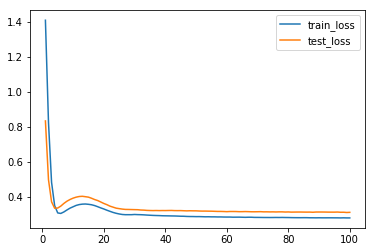

In [21]:
plt.plot(np.arange(1, 101), train_loss, label='train_loss')
plt.plot(np.arange(1, 101), test_loss, label='test_loss')
plt.legend()

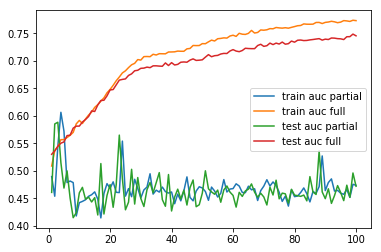

In [22]:
plt.plot(np.arange(1, 101), train_auc1, label='train auc partial')
plt.plot(np.arange(1, 101), train_auc2, label='train auc full')
plt.plot(np.arange(1, 101), test_auc1, label='test auc partial')
plt.plot(np.arange(1, 101), test_auc2, label='test auc full')
plt.legend()

### Train model on noisy dataset

In [23]:
sampler_noisy = SSPNetDataSampler('data_noisy/vocalizationcorpus/')

In [24]:
data_noisy = sampler_noisy.create_sampled_df(FRAME_SEC, save_path='data_noisy/sampled_data.csv')

saving df:  data_noisy/sampled_data.csv


In [36]:
print(f'Frames without laugh: {len(data_noisy.loc[data_noisy["IS_LAUGHTER"] == 0])}') 
print(f'Frames with    laugh: {len(data_noisy.loc[data_noisy["IS_LAUGHTER"] == 1])}')

Frames without laugh: 58041
Frames with    laugh: 2129


In [26]:
data_noisy

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V140,V141,V142,V143,V144,V145,V146,V147,IS_LAUGHTER,SNAME
0,721.311620,39.960290,6.302041,33.157860,4.127883,6.901188,-2.821500,18.229724,1.184624,-7.028255,...,4.881341e+05,4.647760e+05,3.268816e+05,3.517657e+05,5.174890e+05,6.077015e+05,4.218171e+05,2.174354e+04,0,S2044
1,732.296215,33.696921,7.052002,28.558486,5.319928,9.186646,-6.305057,18.251215,-1.087790,-4.342607,...,2.724328e+06,6.808567e+05,6.954919e+05,2.600496e+06,1.051496e+07,6.368782e+06,2.122752e+06,1.880146e+05,0,S2044
2,750.976046,22.520812,9.401386,26.709852,-1.008760,13.841683,-5.259598,17.157061,0.192730,2.421363,...,2.747220e+06,2.012844e+06,1.346534e+06,2.192968e+06,3.895825e+06,2.664101e+06,1.368073e+06,4.866386e+04,0,S2044
3,756.605243,31.571404,5.207126,24.906358,-6.888693,15.605410,-8.168997,14.939672,-0.006372,-0.889879,...,1.056809e+06,7.565004e+05,7.589118e+05,6.860861e+05,8.465996e+05,8.768743e+05,5.106454e+05,2.843584e+04,0,S2044
4,722.506717,40.780914,22.902785,17.051851,-9.288310,18.211233,-6.658574,11.726759,-0.915189,1.429833,...,8.305880e+05,7.630067e+05,5.538631e+05,5.153400e+05,6.130944e+05,5.871541e+05,3.151520e+05,2.464632e+04,0,S2044
5,696.484986,41.580923,25.178597,20.177824,-5.897561,19.302691,-2.574586,14.529226,2.922336,-0.122821,...,4.949633e+05,4.614132e+05,3.475399e+05,3.609997e+05,4.240580e+05,4.703437e+05,2.531913e+05,1.334189e+04,0,S2044
6,710.147825,33.261088,20.491870,33.608639,-7.202999,10.412338,1.367552,10.543707,-3.823221,2.618712,...,5.396724e+05,4.358129e+05,3.829425e+05,4.303462e+05,4.862783e+05,5.692393e+05,3.482952e+05,2.598956e+04,0,S2044
7,936.221430,48.343334,0.960327,16.235094,-20.483255,5.242887,-1.110214,-4.415252,-5.094917,10.810628,...,4.234044e+08,4.122098e+08,2.756732e+08,1.636864e+08,1.671085e+08,1.616503e+08,1.332305e+08,6.320427e+07,0,S2044
8,932.144210,61.921752,-9.916411,15.886042,-21.190722,0.157634,-2.805371,-5.655453,-2.769601,17.739468,...,4.915618e+08,6.854933e+08,6.421082e+08,4.282451e+08,2.759122e+08,1.944993e+08,9.624162e+07,6.297629e+07,0,S2044
9,733.360750,38.382889,9.344382,14.139308,-1.484390,23.132004,-12.038015,4.304355,0.429609,3.932621,...,1.139839e+06,8.294716e+05,4.671452e+05,4.261399e+05,5.517207e+05,6.125755e+05,6.214118e+05,2.149915e+04,0,S2044


In [27]:
data_train_noisy = data_noisy.loc[data['SNAME'].isin(train_files)]
data_test_noisy = data_noisy.loc[data['SNAME'].isin(test_files)]

In [28]:
X_train_noisy = data_train_noisy.drop(['SNAME', 'IS_LAUGHTER'], axis=1).values
X_test_noisy = data_test_noisy.drop(['SNAME', 'IS_LAUGHTER'], axis=1).values
y_train_noisy = data_train_noisy['IS_LAUGHTER'].values
y_test_noisy = data_test_noisy['IS_LAUGHTER'].values

In [29]:
X_train_noisy = X_train_noisy.reshape(-1, sampled_per_file, FEATURES)
X_test_noisy = X_test_noisy.reshape(-1, sampled_per_file, FEATURES)
y_train_noisy = y_train_noisy.reshape(-1, sampled_per_file)
y_test_noisy = y_test_noisy.reshape(-1, sampled_per_file)

In [30]:
X_train_noisy_tensor = torch.tensor(X_train_noisy, dtype=torch.float).permute(1, 0, 2)
X_test_noisy_tensor = torch.tensor(X_test_noisy, dtype=torch.float).permute(1, 0, 2)
y_train_noisy_tensor = torch.tensor(y_train_noisy, dtype=torch.long).permute(1, 0)
y_test_noisy_tensor = torch.tensor(y_test_noisy, dtype=torch.long).permute(1, 0)

In [31]:
y_train_noisy_tensor = y_train_noisy_tensor.reshape(-1)
y_test_noisy_tensor = y_test_noisy_tensor.reshape(-1)

In [33]:
train_loss = []
test_loss = []
train_auc1 = []
train_auc2 = []
test_auc1 = []
test_auc2 = []

for epoch in range(EPOCHS):
    print(f"Starting epoch {epoch + 1}")
    model.train()
    
    # Clean data
    model.zero_grad()
    
    prediction1, prediction2 = model(X_train_tensor)
    loss = get_loss(prediction1, prediction2, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    
    # Noisy data
    model.zero_grad()
    
    prediction1, prediction2 = model(X_train_noisy_tensor)
    loss = get_loss(prediction1, prediction2, y_train_noisy_tensor)
    
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())
    
    auc1, auc2 = get_auc(prediction1.detach(), prediction2.detach(), y_train_noisy_tensor)
    train_auc1.append(auc1)
    train_auc2.append(auc2)
    
    print(f"After epoch {epoch + 1} train auc is {auc2}, loss is {loss}")
    
    with torch.no_grad():
        model.eval()
        prediction1, prediction2 = model(X_test_tensor)
        loss = get_loss(prediction1, prediction2, y_test_tensor)
        test_loss.append(loss)
        auc1, auc2 = get_auc(prediction1, prediction2, y_test_tensor)
        test_auc1.append(auc1)
        test_auc2.append(auc2)
        
        print(f"After epoch {epoch + 1} test auc is {auc2}, loss is {loss}")

Starting epoch 1
After epoch 1 train auc is 0.7650898719664884, loss is 0.2900819480419159
After epoch 1 test auc is 0.7462385715307588, loss is 0.3125959038734436
Starting epoch 2
After epoch 2 train auc is 0.7646479539102956, loss is 0.2900409698486328
After epoch 2 test auc is 0.744883800125898, loss is 0.3125510811805725
Starting epoch 3
After epoch 3 train auc is 0.7680881776377301, loss is 0.28962457180023193
After epoch 3 test auc is 0.7460981262581816, loss is 0.3124482333660126
Starting epoch 4
After epoch 4 train auc is 0.7655076416276864, loss is 0.2896668314933777
After epoch 4 test auc is 0.7450500830085147, loss is 0.31233471632003784
Starting epoch 5
After epoch 5 train auc is 0.7692229943962857, loss is 0.28920868039131165
After epoch 5 test auc is 0.7500681456579897, loss is 0.31246519088745117
Starting epoch 6
After epoch 6 train auc is 0.7695044963801645, loss is 0.2889553904533386
After epoch 6 test auc is 0.7512243994770336, loss is 0.31144827604293823
Starting epo

After epoch 50 train auc is 0.8645141188762524, loss is 0.24331724643707275
After epoch 50 test auc is 0.8583028910624051, loss is 0.26140832901000977
Starting epoch 51
After epoch 51 train auc is 0.8623246549553264, loss is 0.2438957244157791
After epoch 51 test auc is 0.8611036962985837, loss is 0.25999724864959717
Starting epoch 52
After epoch 52 train auc is 0.8653295035144211, loss is 0.24260899424552917
After epoch 52 test auc is 0.8551826881034089, loss is 0.26228785514831543
Starting epoch 53
After epoch 53 train auc is 0.8657677839353758, loss is 0.24214968085289001
After epoch 53 test auc is 0.8576240099355994, loss is 0.2605823874473572
Starting epoch 54
After epoch 54 train auc is 0.8638154541781007, loss is 0.24287942051887512
After epoch 54 test auc is 0.8582267074983986, loss is 0.2610727548599243
Starting epoch 55
After epoch 55 train auc is 0.8684587316837276, loss is 0.24150821566581726
After epoch 55 test auc is 0.8599386360915524, loss is 0.2598944306373596
Starting

After epoch 99 train auc is 0.8752514793542269, loss is 0.2350640594959259
After epoch 99 test auc is 0.8700290951428035, loss is 0.25198373198509216
Starting epoch 100
After epoch 100 train auc is 0.8733541956367493, loss is 0.23646286129951477
After epoch 100 test auc is 0.8707312799661237, loss is 0.25276315212249756


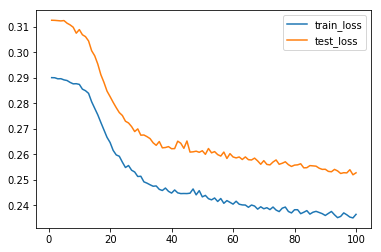

In [34]:
plt.plot(np.arange(1, 101), train_loss, label='train_loss')
plt.plot(np.arange(1, 101), test_loss, label='test_loss')
plt.legend()

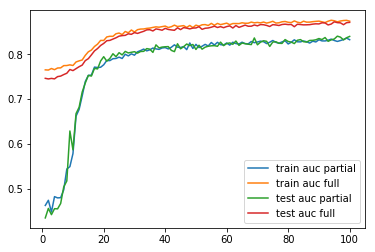

In [35]:
plt.plot(np.arange(1, 101), train_auc1, label='train auc partial')
plt.plot(np.arange(1, 101), train_auc2, label='train auc full')
plt.plot(np.arange(1, 101), test_auc1, label='test auc partial')
plt.plot(np.arange(1, 101), test_auc2, label='test auc full')
plt.legend()

In [78]:
model.eval()

def plot_sample(sname):
    global model
    plt.subplot(211)
    X = torch.tensor(data[data['SNAME'] == sname].drop(['SNAME', 'IS_LAUGHTER'], axis=1).values, dtype=torch.float)
    y = torch.tensor(data[data['SNAME'] == sname]['IS_LAUGHTER'].values, dtype=torch.long)
    with torch.no_grad():
        y_pred = model(X)[0].numpy()[:, 0, 1]
    xs = np.arange(len(y))
    plt.title('Without noise')
    plt.plot(xs, y.numpy(), c='r')
    plt.plot(xs, np.exp(y_pred), c='b')
    
    plt.subplot(212)
    X = torch.tensor(data_noisy[data_noisy.SNAME == sname].iloc[:, :-2].values, dtype=torch.float)
    y = torch.tensor(data_noisy[data_noisy.SNAME == sname].iloc[:, -2].values, dtype=torch.long)
    with torch.no_grad():
        y_pred_noise = model(X)[0].numpy()[:, 0, 1]
    xs = np.arange(len(y))
    plt.title('With noise')
    plt.plot(xs, y.numpy(), c='r')
    plt.plot(xs, np.exp(y_pred_noise), c='b')
    
    # print(y_pred - y_pred_noise)
    
    plt.show()

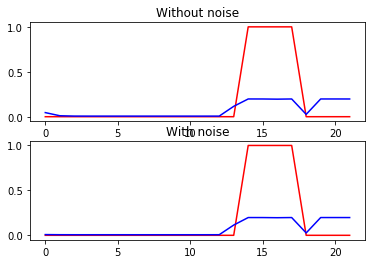

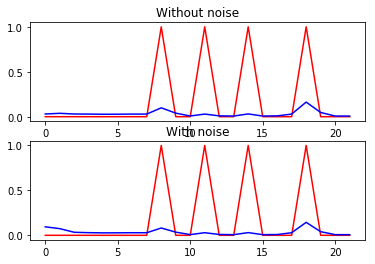

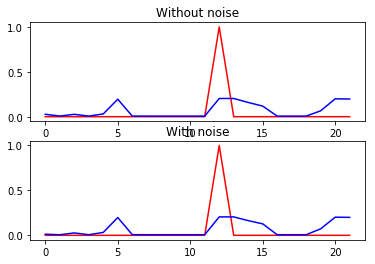

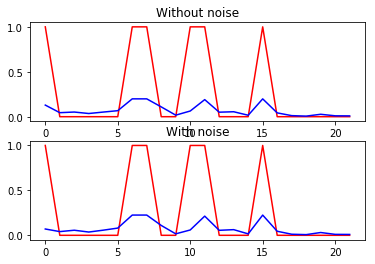

In [92]:

plot_sample('S0510')
plot_sample('S0549')
plot_sample('S2378')
plot_sample('S1263')

In [47]:
model

MultiInputRNN(
  (lstm_mfcc): LSTM(20, 128)
  (lstm_fbank): LSTM(128, 128)
  (predict_mfcc): Linear(in_features=128, out_features=2, bias=True)
  (predict_total): Linear(in_features=256, out_features=2, bias=True)
)